<a href="https://colab.research.google.com/github/trighpro123/BT_tuan13/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [3]:
data_root='/content/drive/My Drive/Money/money'

In [4]:
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/My Drive/Money/money
Found 307 images belonging to 9 classes.
Found 1246 images belonging to 9 classes.


In [5]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
print(train_generator.class_indices)

Image batch shape:  (32, 150, 150, 3)
Label batch shape:  (32, 9)
['001000' '002000' '005000' '010000' '020000' '050000' '100000' '200000'
 '500000']
{'001000': 0, '002000': 1, '005000': 2, '010000': 3, '020000': 4, '050000': 5, '100000': 6, '200000': 7, '500000': 8}


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


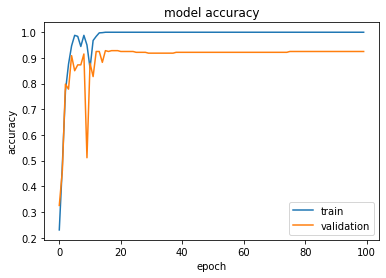

In [7]:

model=Sequential()
# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 phụ thuộc vào bội số byte
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) # padding same để kích thước trước giông skichs thước sau
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

# #Tạo neurel model
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(train_generator,epochs=100,batch_size=128,validation_data=valid_generator,verbose=1)

# # Vẽ đồ thị bằng plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [8]:
# SAVE
model.save("Tien.h5")

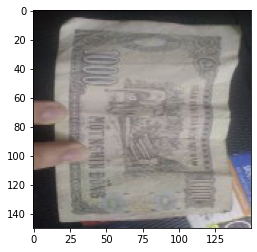

10,000


In [9]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/My Drive/Money/test/1000.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("1,000")
if(kq==1):
    print("2,000")
if(kq==2):
    print("5,000")
if(kq==3):
    print("10,000")
if(kq==4):
    print("20,000")
if(kq==5):
    print("50,000")
if(kq==6):
    print("100,000")
if(kq==7):
    print("200,000")
if(kq==8):
    print("500,000")


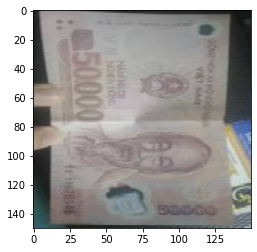

10,000


In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/My Drive/Money/test/50000.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("1,000")
if(kq==1):
    print("2,000")
if(kq==2):
    print("5,000")
if(kq==3):
    print("10,000")
if(kq==4):
    print("20,000")
if(kq==5):
    print("50,000")
if(kq==6):
    print("100,000")
if(kq==7):
    print("200,000")
if(kq==8):
    print("500,000")


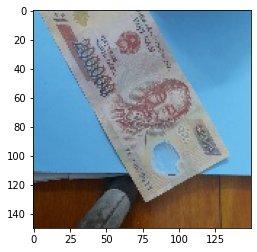

200,000


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/My Drive/Money/test/200000_12.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("1,000")
if(kq==1):
    print("2,000")
if(kq==2):
    print("5,000")
if(kq==3):
    print("10,000")
if(kq==4):
    print("20,000")
if(kq==5):
    print("50,000")
if(kq==6):
    print("100,000")
if(kq==7):
    print("200,000")
if(kq==8):
    print("500,000")
